In [152]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os
from IPython import display as ipd

In [153]:
# read data

csv_file_path = "ESC-50-master/meta/esc50.csv"
audio_files_path = "ESC-50-master/audio/"


df = pd.read_csv(csv_file_path)


In [154]:
# utils

def get_audio_file(filename:str):
    return os.path.join(audio_files_path, filename)


def play_sound(sound_data, sample_rate):
    return ipd.display(ipd.Audio(data=sound_data,rate=sample_rate))



def group_data_by_category(wave_list_data):
    category_groups = {}
    for wave in wave_list_data:
        category, filename, sample_rate, sound_data = wave
        if category not in category_groups:
            category_groups[category] = []
        category_groups[category].append((category, filename, sample_rate, sound_data))

    return category_groups



def sample_sounds_by_category(categories: dict):
    
    sampled_sounds = {} 
    
    for category, sounds in categories.items():
        # Get all rows matching the sounds in this category
        category_df = df[df['category'].isin(sounds)]
        # Sample one from each sound type 
        samples = pd.concat([
            category_df[category_df['category'] == sound].sample(n=1)
            for sound in sounds
        ])
        # Store filenames in dictionary
        sampled_sounds[category] = samples['filename'].tolist()
    
    return sampled_sounds


In [155]:
# Define categories and their sounds 400
categories = {
    'Animals': ['dog', 'cat', ],
    'Natural soundscapes & water sounds': ['rain', 'sea_waves'],
    'Human sounds': ['coughing', 'footsteps'],
    'Interior/domestic sounds': ['keyboard_typing', 'vacuum_cleaner'],
    'Exterior/urban noises': ['airplane', 'car_horn']
}


sampled_sounds = sample_sounds_by_category(categories)

sampled_sounds


{'Animals': ['5-203128-A-0.wav', '3-146972-A-5.wav'],
 'Natural soundscapes & water sounds': ['1-29561-A-10.wav',
  '3-144827-A-11.wav'],
 'Human sounds': ['1-19111-A-24.wav', '1-155858-F-25.wav'],
 'Interior/domestic sounds': ['5-216131-A-32.wav', '2-122820-B-36.wav'],
 'Exterior/urban noises': ['3-143562-A-47.wav', '5-180156-B-43.wav']}

In [156]:
wave_list_data = [] 

for category in sampled_sounds:
    for filename in sampled_sounds[category]:
        complete_path = get_audio_file(filename)
        sample_rate, sound_data = wavfile.read(complete_path)
        wave_list_data.append((category, filename, sample_rate,sound_data))


In [157]:
# Plot functions

def create_waveform_subplot(ax, sample_rate, sound_data, filename):
    time = np.linspace(0., len(sound_data) / sample_rate, len(sound_data))
    ax.plot(time, sound_data)
    ax.set_title(f'Waveform\n{filename}')
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")


def create_spectrogram_subplot(ax, sample_rate, sound_data, filename):
    window = signal.windows.hann(1024)
    f, t, Sxx = signal.spectrogram(sound_data, sample_rate, window=window)
    im = ax.pcolormesh(t, f, 20 * np.log10(Sxx), shading='gouraud')
    ax.set_title(f'Spectrogram\n{filename}')
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")
    return im  # Return colormap for potential colorbar

def create_histogram_subplot(ax, sound_data, filename):
 
    ax.hist(sound_data, bins=50)
    ax.set_title(f'Histogram\n{filename}')
    ax.set_xlabel("Amplitude")
    ax.set_ylabel("Frequency")

Analyzing Animals category


/var/folders/b5/8qvrx5b94rv2txsfvw8tjdj00000gn/T/ipykernel_62382/2213752534.py:14: RuntimeWarning: divide by zero encountered in log10
  im = ax.pcolormesh(t, f, 20 * np.log10(Sxx), shading='gouraud')


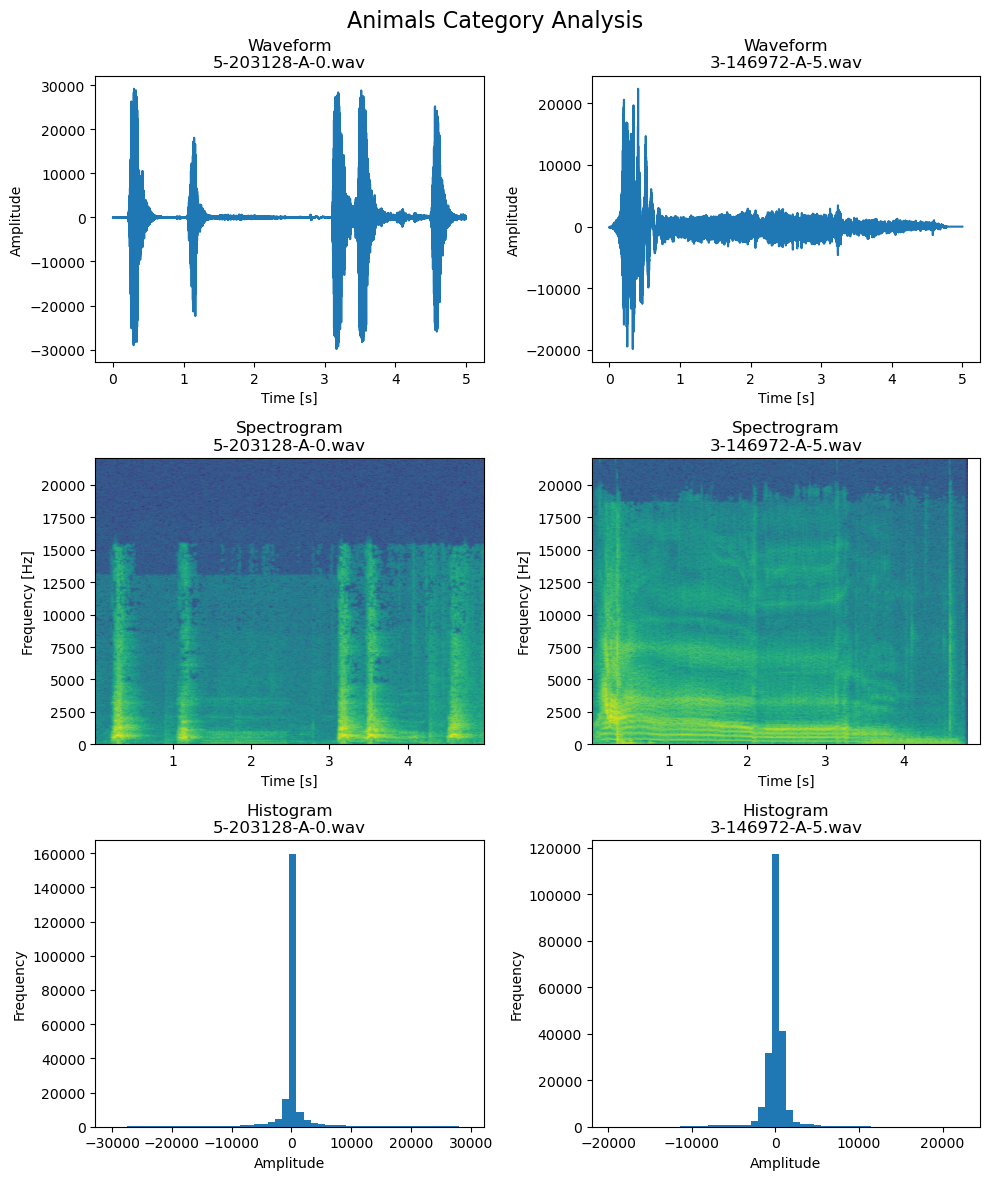

Analyzing Natural soundscapes & water sounds category


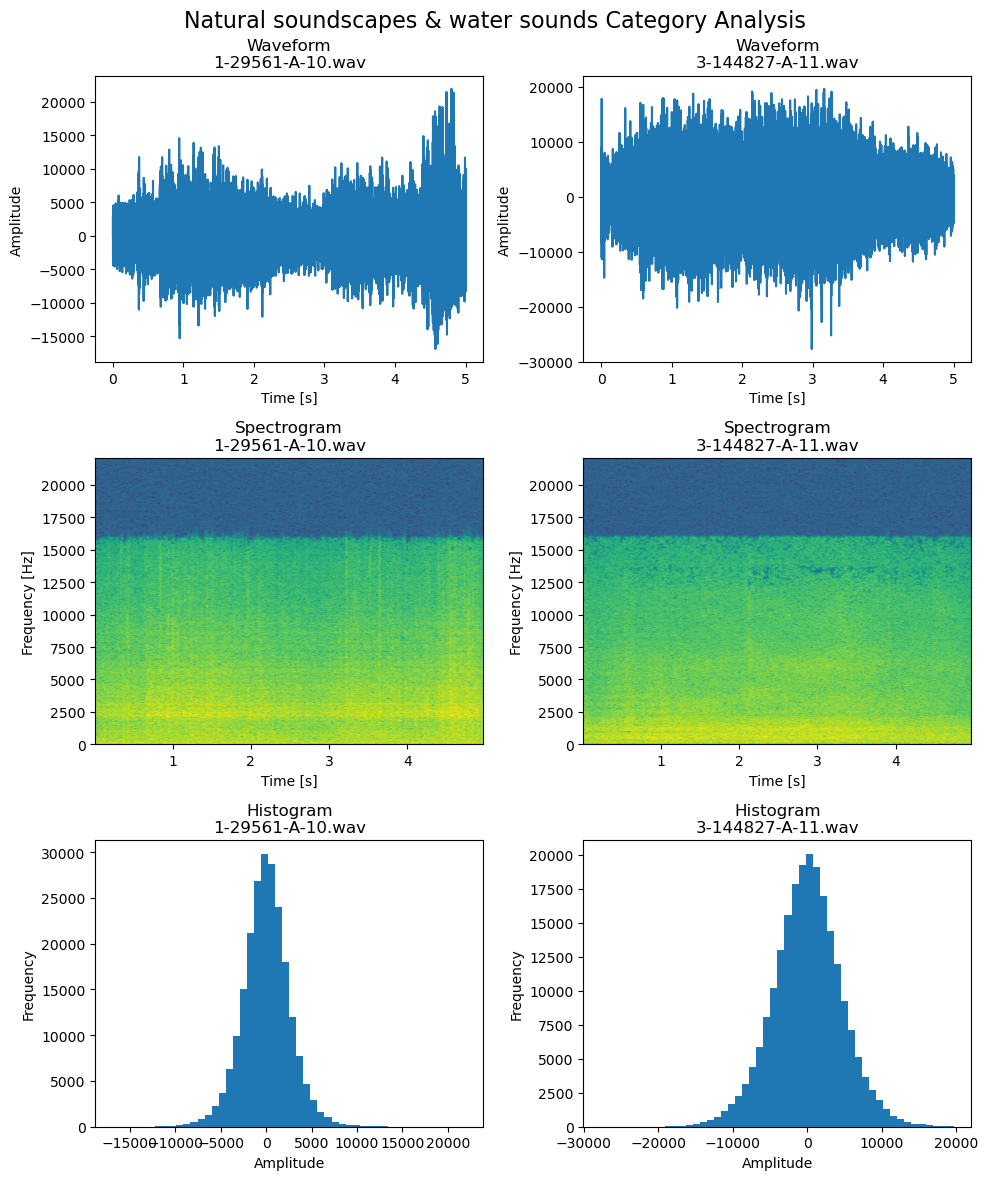

Analyzing Human sounds category


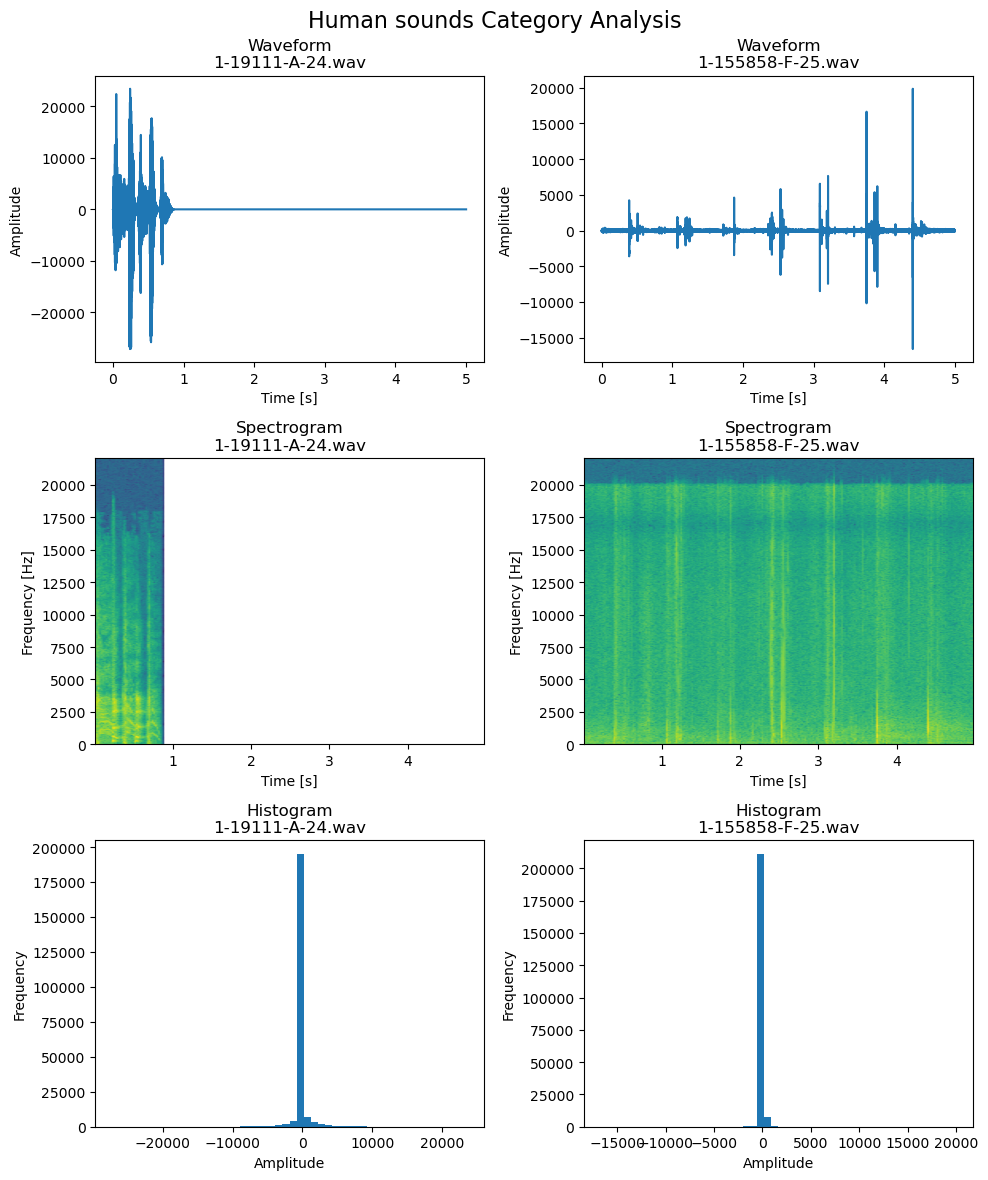

Analyzing Interior/domestic sounds category


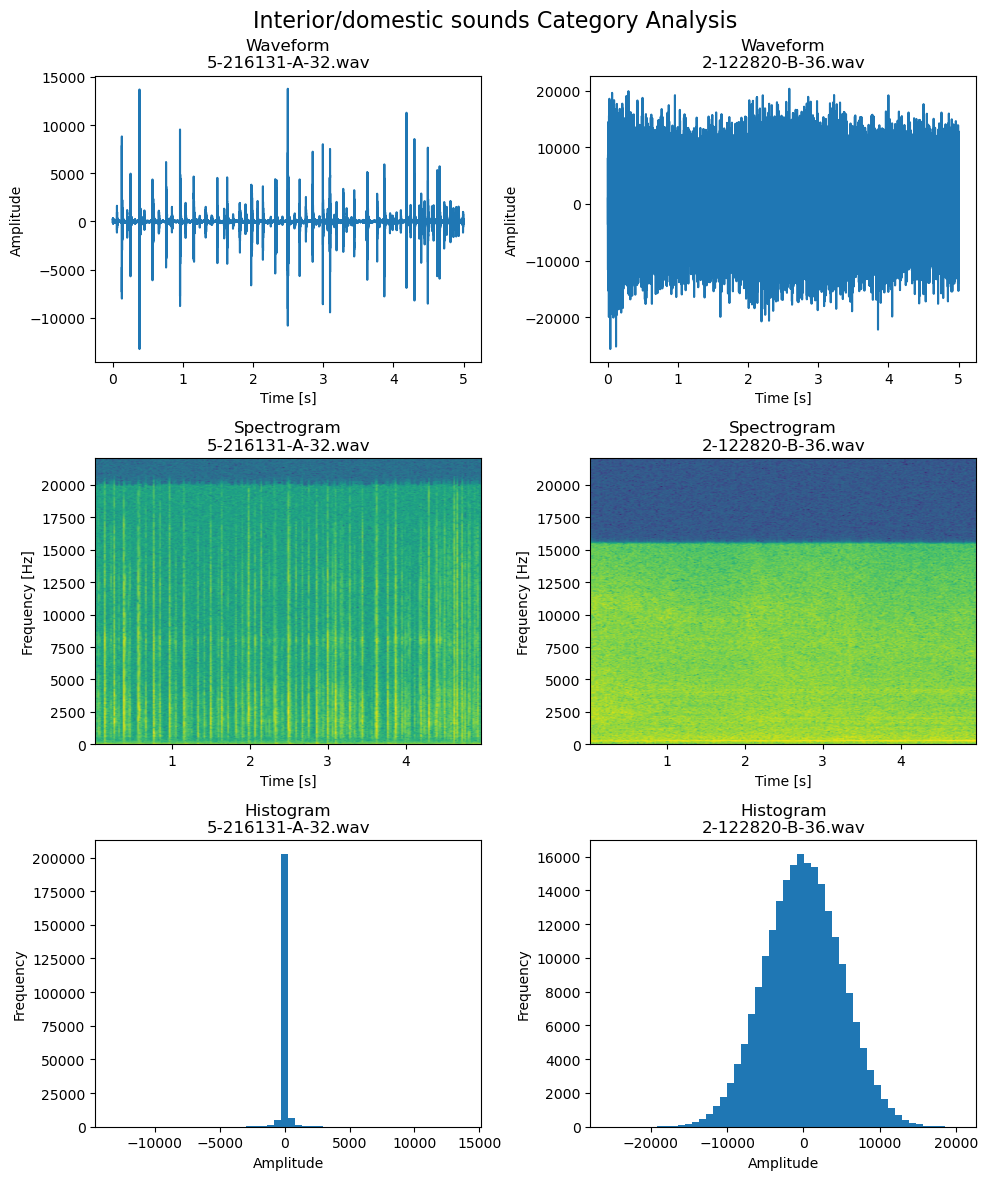

Analyzing Exterior/urban noises category


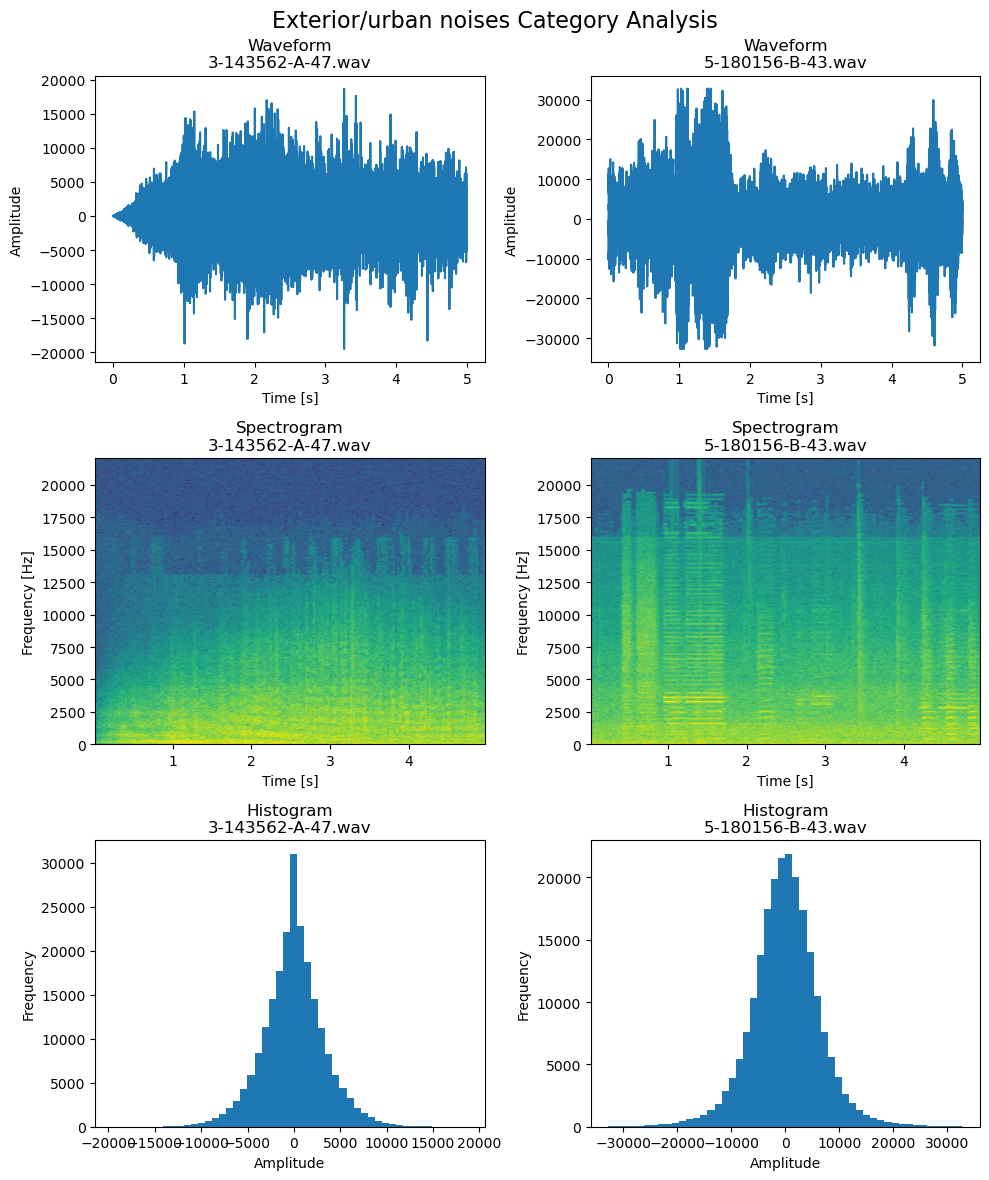

In [158]:
def visualize_category_sounds(wave_list_data):
    # Get unique categories while preserving order
    categories = []
    for category, _, _, _ in wave_list_data:
        if category not in categories:
            categories.append(category)
    
    # Iterate through unique categories
    for category in categories:
        # Filter waves for current category
        category_waves = [wave for wave in wave_list_data if wave[0] == category]
        
        # Determine number of files in this category
        num_files = len(category_waves)
        
        # Create a figure with subplots
        plt.figure(figsize=(5*num_files, 12))
        plt.suptitle(f'{category} Category Analysis', fontsize=16)
        
        print(f"Analyzing {category} category")
        
        # Iterate through waves in this category
        for idx, (category, filename, sample_rate, sound_data) in enumerate(category_waves):

            play_sound(sound_data, sample_rate)
            

            ax_wave = plt.subplot(3, num_files, idx+1)
            create_waveform_subplot(ax_wave, sample_rate, sound_data, filename)
            
            # Spectrogram subplot
            ax_spec = plt.subplot(3, num_files, num_files+idx+1)
            im_spec = create_spectrogram_subplot(ax_spec, sample_rate, sound_data, filename)
            
            # Histogram subplot
            ax_hist = plt.subplot(3, num_files, 2*num_files+idx+1)
            create_histogram_subplot(ax_hist, sound_data, filename)
        
        plt.tight_layout()
        plt.show()


visualize_category_sounds(wave_list_data)